# Deck 110 vs 195 - Exploring the WWII anomaly

We've explored these deck extensively and can subclass by vessel type

In [1]:
import pandas as pd
import numpy as np

import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999

In [2]:
#load ICOADS195

dck_195 = pd.read_csv('../Deck195_CleanID.csv',dtype={'ID':str})
dck_195.head(5)

,time,time.1,latitude,longitude,ID,AT,SLP,DCK,SID,PT,UID,W,D,SST,QI10,ID_clean,ID_pre,ID_suf
0,1941-12-31 22:00:00+00:00,1941-12-31T22:00:00Z,-34.5,151.5,61033,22.2,1016.3,195,1.0,0.0,0M8E0K,0.0,361,NaN,NaN,61033,61,33
1,1941-12-31 23:00:00+00:00,1941-12-31T23:00:00Z,-4.5,128.5,39001,28.9,1008.8,195,1.0,0.0,0M8E1A,1.0,50,NaN,NaN,39001,39,1
2,1941-12-31 23:00:00+00:00,1941-12-31T23:00:00Z,-9.5,135.5,12211,27.8,1009.8,195,1.0,0.0,0M8E1B,9.8,20,30.0,NaN,12211,12,211
3,1941-12-31 23:00:00+00:00,1941-12-31T23:00:00Z,-12.5,131.5,94020,27.2,1005.8,195,1.0,0.0,0M8E1C,2.6,280,NaN,NaN,94020,94,20
4,1942-01-01 00:00:00+00:00,1942-01-01T00:00:00Z,14.5,121.5,27006,25.0,1010.8,195,1.0,0.0,0M8E2F,4.6,110,NaN,NaN,27006,27,6


In [3]:
#load deck 110
dck_110 = pd.read_csv('../Deck110_Parse/deck110_thinned.csv')
dck_110['octant'] = pd.to_numeric(dck_110['octant'],errors='coerce')
dck_110.drop(columns=['Unnamed: 0'],inplace=True)
dck_110.head(5)

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,4,5,6,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,octant,latitude,longitude,year,month,day,hour,pressure,drybulbF,watertempF,wetbulbF,dewpointF,shipNo,datetime
0,1.0,49.0,48.0,45.0,04,08,0.0,NaN,NaN,NaN,NaN,NaN,389,1945-04-08 00:00:00
1,1.0,49.0,48.0,45.0,04,08,1.0,35.0,41.0,43.0,39.0,NaN,389,1945-04-08 01:00:00
2,1.0,49.0,48.0,45.0,04,08,2.0,34.7,40.0,43.0,38.0,NaN,389,1945-04-08 02:00:00
3,1.0,49.0,48.0,45.0,04,08,3.0,33.5,40.0,43.0,38.0,8.0,389,1945-04-08 03:00:00
4,1.0,49.0,48.0,45.0,04,08,4.0,33.0,40.0,43.0,38.0,NaN,389,1945-04-08 04:00:00


In [4]:
s110 = pd.to_datetime(dck_110.datetime)
s195 = pd.to_datetime(dck_195.time)

(-9497.0, -8402.0)

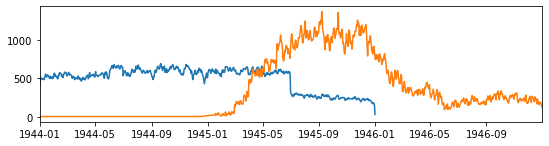

In [5]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
ax1.plot(s195.groupby(s195.dt.floor('d')).size().index,
         s195.groupby(s195.dt.floor('d')).size().reset_index(name='count')['count'])
ax1.plot(s110.groupby(s110.dt.floor('d')).size().index,
         s110.groupby(s110.dt.floor('d')).size().reset_index(name='count')['count'])
ax1.set_xlim([datetime.date(1944,1,1),datetime.date(1946,12,31)])

In [6]:
dck_110.loc[dck_110['octant'] > 4, 'latitude'] = dck_110.loc[dck_110['octant'] > 4]['latitude'] * -1.

dck_110.loc[(dck_110['octant'] == 0) | (dck_110['octant'] == 5), 'longitude'] = \
    360 - dck_110.loc[(dck_110['octant'] == 0) | (dck_110['octant'] == 5), 'longitude']

dck_110.loc[(dck_110['octant'] == 1) | (dck_110['octant'] == 6), 'longitude'] = \
    260 - dck_110.loc[(dck_110['octant'] == 1) | (dck_110['octant'] == 6), 'longitude']


dck_110.loc[(dck_110['octant'] == 2) | (dck_110['octant'] == 7) , 'longitude'] = \
    101 + dck_110.loc[(dck_110['octant'] == 2) | (dck_110['octant'] == 7), 'longitude']


## Plot the two decks on a map for 1945/1946

This is the period of time they overlap

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [8]:
#define the basic map projection information and figure size

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20.5, 5.25),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

#download land mask
# 50m is a good balance between dataset size and land feature resolution
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


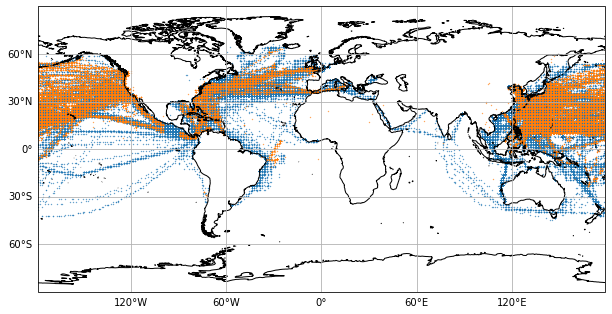

In [9]:

fig,ax = make_map()
ax.scatter(dck_195[dck_195['time.1']>='1945'].longitude,dck_195[dck_195['time.1']>='1945'].latitude,.1)
ax.scatter(dck_110[dck_110['datetime']<='1946']['longitude'],dck_110[dck_110['datetime']<='1946']['latitude'],.1)

ax.set_extent([-179,179,90,-90])
# ax.add_feature(land_50m)
ax.coastlines(resolution='50m')


## Averages...

- monthly/seasonally

- box?
- zonal average (hovmoller plot)


In [10]:
dck_195_tw = dck_195[dck_195['time.1']>='1945']
dck_110_tw = dck_110[dck_110['datetime']<='1946']
dck_110_tw

,octant,latitude,longitude,year,month,day,hour,pressure,drybulbF,watertempF,wetbulbF,dewpointF,shipNo,datetime
0,1.0,49.0,212.0,45.0,04,08,0.0,NaN,NaN,NaN,NaN,NaN,389,1945-04-08 00:00:00
1,1.0,49.0,212.0,45.0,04,08,1.0,35.0,41.0,43.0,39.0,NaN,389,1945-04-08 01:00:00
2,1.0,49.0,212.0,45.0,04,08,2.0,34.7,40.0,43.0,38.0,NaN,389,1945-04-08 02:00:00
3,1.0,49.0,212.0,45.0,04,08,3.0,33.5,40.0,43.0,38.0,8.0,389,1945-04-08 03:00:00
4,1.0,49.0,212.0,45.0,04,08,4.0,33.0,40.0,43.0,38.0,NaN,389,1945-04-08 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786984,7.0,-20.0,173.0,45,10,24,11,15.5,73.0,75.0,68.0,NaN,231,1945-10-24 11:00:00
786985,7.0,-20.0,172.0,45,10,24,8,14.9,76.0,74.0,74.0,NaN,231,1945-10-24 08:00:00
786986,7.0,-20.0,171.0,45,11,27,7,13.0,78.0,77.0,72.0,NaN,150,1945-11-27 07:00:00
786987,7.0,-20.0,172.0,45,11,12,15,11.9,76.0,77.0,73.0,NaN,4,1945-11-12 15:00:00


In [11]:
bins = np.arange(-90,95,2.5)

#Zonal - 2.5deg bins, daily ave
dfcounts_110 = pd.DataFrame(pd.cut(dck_110_tw['latitude'], bins).value_counts()).rename(columns={'latitude':'counts_110'})

dfmean_110 = dck_110_tw.groupby(pd.cut(dck_110_tw['latitude'], bins)).mean()
dfmean_110 = dfmean_110.rename_axis(index='')

df110_F = pd.merge(dfcounts_110,dfmean_110,left_index=True,right_index=True)[['drybulbF','watertempF','counts_110']]
df110_F['drybulbC'] = (df110_F['drybulbF'] - 32 ) / (9/5)
df110_F['watertempC'] = (df110_F['watertempF'] - 32 ) / (9/5)


In [12]:
dfcounts_195 = pd.DataFrame(pd.cut(dck_195_tw['latitude'], bins).value_counts()).rename(columns={'latitude':'counts_195'})

dfmean_195 = dck_195_tw.groupby(pd.cut(dck_195_tw['latitude'], bins)).mean()
dfmean_195 = dfmean_195.rename_axis(index='')

df195 = pd.merge(dfcounts_195,dfmean_195,left_index=True,right_index=True)[['AT','SST','counts_195']].sort_index()

(-3.0, 3.0)

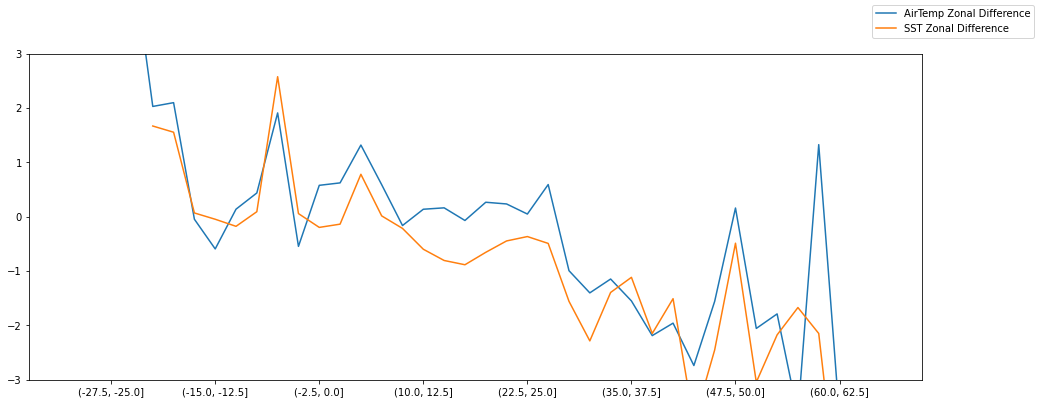

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,6), sharex=True)
both_decks = pd.merge(df110_F, df195, right_index=True, left_index=True).sort_index()
(both_decks.AT - both_decks.drybulbC).plot(ax=axes, label='AirTemp Zonal Difference')
(both_decks.SST - both_decks.watertempC).plot(ax=axes, label='SST Zonal Difference')

fig.legend()
axes.set_ylim([-3,3])

<AxesSubplot:>

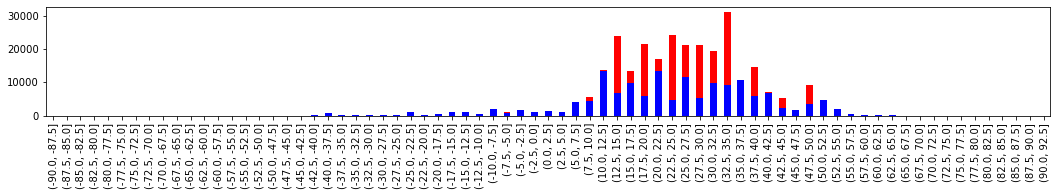

In [14]:
both_decks.counts_110.plot(kind='bar',color='red',figsize=(18,2))
both_decks.counts_195.plot(kind='bar',color='blue')

In [15]:
### Split into ocean basins and temporal/seasons